In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

In [2]:
# This file is just me messing around with quantum entanglement
# Quantum teleportation and superdense coding

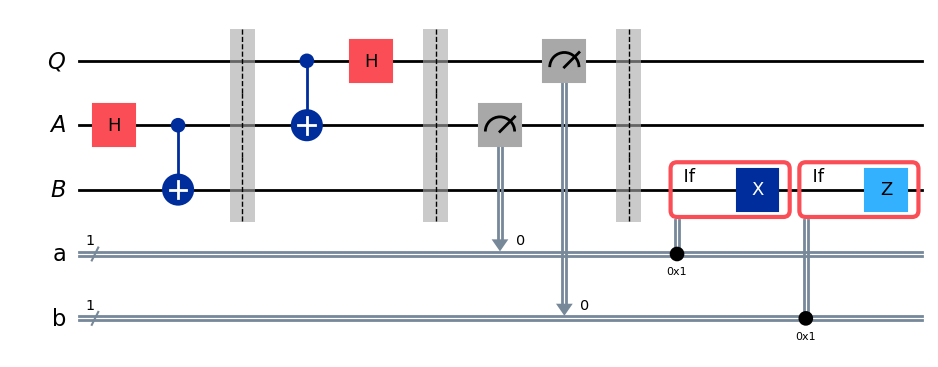

In [3]:
# Quantum teleportation is how you can move an unknown qubit to another location
# This does not violate the no-cloning rule because the previous qubit is destroyed and this qubit can only be sent to one location

qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")
 
protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()
 
# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()
 
# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()
 
# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)
 
display(protocol.draw(output="mpl"))

In [4]:
# generate random gate
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)
 
display(array_to_latex(random_gate.to_matrix()))

<IPython.core.display.Latex object>

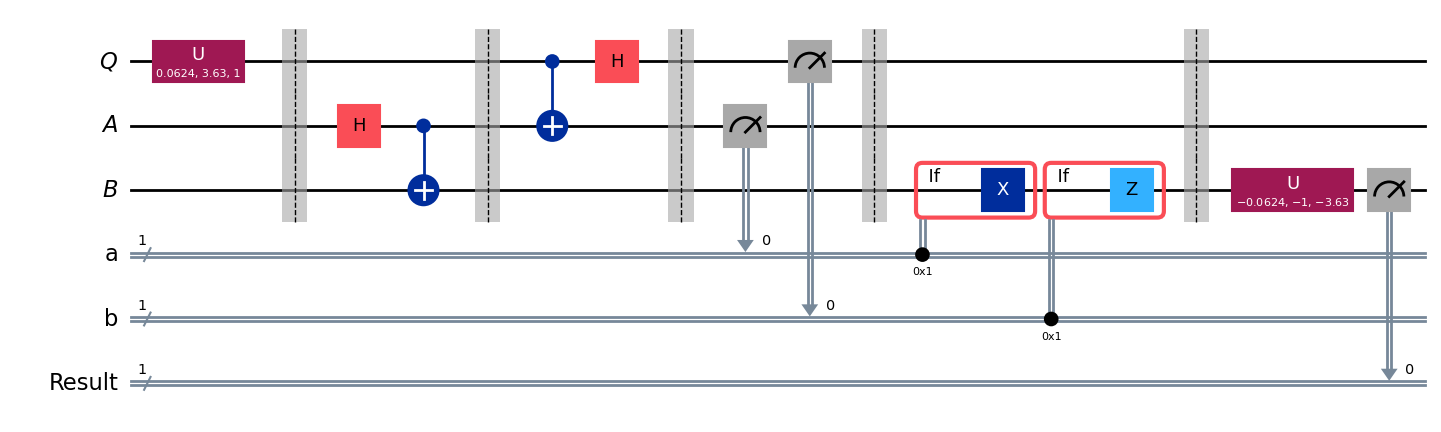

In [5]:
# Create a new circuit including the same bits and qubits used in the teleportation protocol.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)
 
# Start with the randomly selected gate on Q
 
test.append(random_gate, qubit)
test.barrier()
 
# Append the entire teleportation protocol from above.
 
test = test.compose(protocol)
test.barrier()
 
# Finally, apply the inverse of the random unitary to B and measure.
 
test.append(random_gate.inverse(), ebit1)
result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)
 
display(test.draw(output="mpl"))

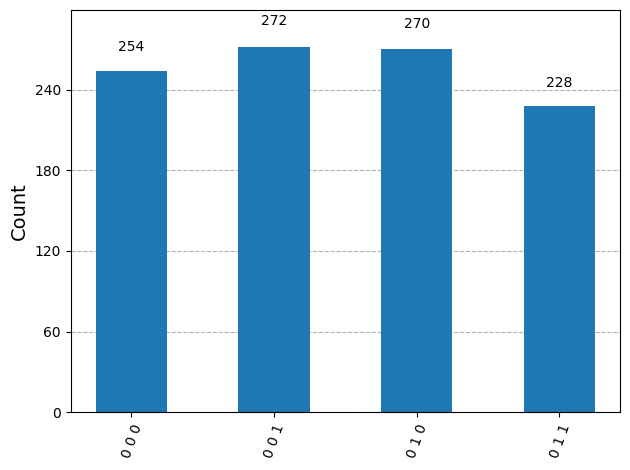

In [6]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

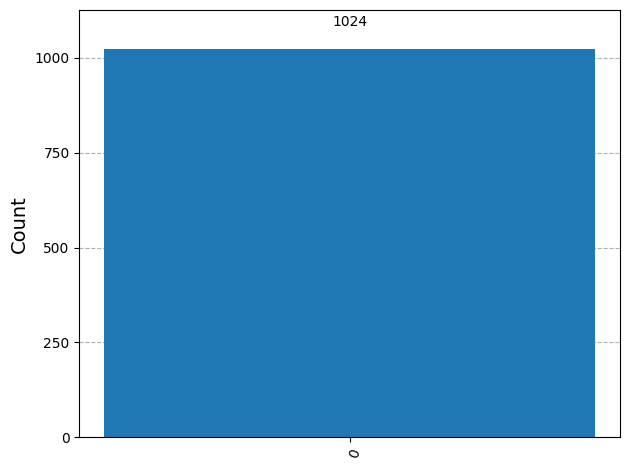

In [7]:
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))